# Import section

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import glob
import os
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
tqdm.pandas()

# Load original taxonomy and new taxonomy

### Complete taxonomy here (keep colapsed)

In [36]:
# Taxonomy ids and names pulled from here: https://github.com/patcg-individual-drafts/topics/blob/main/taxonomy_v1.md

cat_map = {
1: '/Arts & Entertainment',
2: '/Arts & Entertainment/Acting & Theater',
3: '/Arts & Entertainment/Comics',
4: '/Arts & Entertainment/Concerts & Music Festivals',
5: '/Arts & Entertainment/Dance',
6: '/Arts & Entertainment/Entertainment Industry',
7: '/Arts & Entertainment/Humor',
8: '/Arts & Entertainment/Humor/Live Comedy',
9: '/Arts & Entertainment/Live Sporting Events',
10: '/Arts & Entertainment/Magic',
11: '/Arts & Entertainment/Movie Listings & Theater Showtimes',
12: '/Arts & Entertainment/Movies',
13: '/Arts & Entertainment/Movies/Action & Adventure Films',
14: '/Arts & Entertainment/Movies/Animated Films',
15: '/Arts & Entertainment/Movies/Comedy Films',
16: '/Arts & Entertainment/Movies/Cult & Indie Films',
17: '/Arts & Entertainment/Movies/Documentary Films',
18: '/Arts & Entertainment/Movies/Drama Films',
19: '/Arts & Entertainment/Movies/Family Films',
20: '/Arts & Entertainment/Movies/Horror Films',
21: '/Arts & Entertainment/Movies/Romance Films',
22: '/Arts & Entertainment/Movies/Thriller, Crime & Mystery Films',
23: '/Arts & Entertainment/Music & Audio',
24: '/Arts & Entertainment/Music & Audio/Blues',
25: '/Arts & Entertainment/Music & Audio/Classical Music',
26: '/Arts & Entertainment/Music & Audio/Country Music',
27: '/Arts & Entertainment/Music & Audio/Dance & Electronic Music',
28: '/Arts & Entertainment/Music & Audio/Folk & Traditional Music',
29: '/Arts & Entertainment/Music & Audio/Jazz',
30: '/Arts & Entertainment/Music & Audio/Musical Instruments',
31: '/Arts & Entertainment/Music & Audio/Pop Music',
32: '/Arts & Entertainment/Music & Audio/Rap & Hip-Hop',
33: '/Arts & Entertainment/Music & Audio/Rock Music',
34: '/Arts & Entertainment/Music & Audio/Rock Music/Classic Rock & Oldies',
35: '/Arts & Entertainment/Music & Audio/Rock Music/Hard Rock & Progressive',
36: '/Arts & Entertainment/Music & Audio/Rock Music/Indie & Alternative Music',
37: '/Arts & Entertainment/Music & Audio/Soul & R&B',
38: '/Arts & Entertainment/Music & Audio/Soundtracks',
39: '/Arts & Entertainment/Music & Audio/Talk Radio',
40: '/Arts & Entertainment/Music & Audio/World Music',
41: '/Arts & Entertainment/Music & Audio/World Music/Reggae & Caribbean Music',
42: '/Arts & Entertainment/Online Image Galleries',
43: '/Arts & Entertainment/Online Video',
44: '/Arts & Entertainment/Opera',
45: '/Arts & Entertainment/TV Shows & Programs',
46: '/Arts & Entertainment/TV Shows & Programs/TV Comedies',
47: '/Arts & Entertainment/TV Shows & Programs/TV Documentary & Nonfiction',
48: '/Arts & Entertainment/TV Shows & Programs/TV Dramas',
49: '/Arts & Entertainment/TV Shows & Programs/TV Dramas/TV Soap Operas',
50: '/Arts & Entertainment/TV Shows & Programs/TV Family-Oriented Shows',
51: '/Arts & Entertainment/TV Shows & Programs/TV Reality Shows',
52: '/Arts & Entertainment/TV Shows & Programs/TV Sci-Fi & Fantasy Shows',
53: '/Arts & Entertainment/Visual Art & Design',
54: '/Arts & Entertainment/Visual Art & Design/Design',
55: '/Arts & Entertainment/Visual Art & Design/Painting',
56: '/Arts & Entertainment/Visual Art & Design/Photographic & Digital Arts',
57: '/Autos & Vehicles',
58: '/Autos & Vehicles/Cargo Trucks & Trailers',
59: '/Autos & Vehicles/Classic Vehicles',
60: '/Autos & Vehicles/Custom & Performance Vehicles',
61: '/Autos & Vehicles/Gas Prices & Vehicle Fueling',
62: '/Autos & Vehicles/Motor Vehicles (By Type)',
63: '/Autos & Vehicles/Motor Vehicles (By Type)/Autonomous Vehicles',
64: '/Autos & Vehicles/Motor Vehicles (By Type)/Convertibles',
65: '/Autos & Vehicles/Motor Vehicles (By Type)/Coupes',
66: '/Autos & Vehicles/Motor Vehicles (By Type)/Hatchbacks',
67: '/Autos & Vehicles/Motor Vehicles (By Type)/Hybrid & Alternative Vehicles',
68: '/Autos & Vehicles/Motor Vehicles (By Type)/Luxury Vehicles',
69: '/Autos & Vehicles/Motor Vehicles (By Type)/Microcars & Subcompacts',
70: '/Autos & Vehicles/Motor Vehicles (By Type)/Motorcycles',
71: '/Autos & Vehicles/Motor Vehicles (By Type)/Off-Road Vehicles',
72: '/Autos & Vehicles/Motor Vehicles (By Type)/Pickup Trucks',
73: '/Autos & Vehicles/Motor Vehicles (By Type)/Scooters & Mopeds',
74: '/Autos & Vehicles/Motor Vehicles (By Type)/Sedans',
75: '/Autos & Vehicles/Motor Vehicles (By Type)/Station Wagons',
76: '/Autos & Vehicles/Motor Vehicles (By Type)/SUVs & Crossovers',
77: '/Autos & Vehicles/Motor Vehicles (By Type)/SUVs & Crossovers/Crossovers',
78: '/Autos & Vehicles/Motor Vehicles (By Type)/Vans & Minivans',
79: '/Autos & Vehicles/Towing & Roadside Assistance',
80: '/Autos & Vehicles/Vehicle & Traffic Safety',
81: '/Autos & Vehicles/Vehicle Parts & Accessories',
82: '/Autos & Vehicles/Vehicle Repair & Maintenance',
83: '/Autos & Vehicles/Vehicle Shopping',
84: '/Autos & Vehicles/Vehicle Shopping/Used Vehicles',
85: '/Autos & Vehicles/Vehicle Shows',
86: '/Beauty & Fitness',
87: '/Beauty & Fitness/Body Art',
88: '/Beauty & Fitness/Face & Body Care',
89: '/Beauty & Fitness/Face & Body Care/Antiperspirants, Deodorants & Body Sprays',
90: '/Beauty & Fitness/Face & Body Care/Bath & Body Products',
91: '/Beauty & Fitness/Face & Body Care/Clean Beauty',
92: '/Beauty & Fitness/Face & Body Care/Make-Up & Cosmetics',
93: '/Beauty & Fitness/Face & Body Care/Nail Care Products',
94: '/Beauty & Fitness/Face & Body Care/Perfumes & Fragrances',
95: '/Beauty & Fitness/Face & Body Care/Razors & Shavers',
96: '/Beauty & Fitness/Fashion & Style',
97: '/Beauty & Fitness/Fitness',
98: '/Beauty & Fitness/Fitness/Bodybuilding',
99: '/Beauty & Fitness/Hair Care',
100: '/Books & Literature',
101: '/Books & Literature/Childrens Literature',
102: '/Books & Literature/Poetry',
103: '/Business & Industrial',
104: '/Business & Industrial/Advertising & Marketing',
105: '/Business & Industrial/Advertising & Marketing/Sales',
106: '/Business & Industrial/Agriculture & Forestry',
107: '/Business & Industrial/Agriculture & Forestry/Food Production',
108: '/Business & Industrial/Automotive Industry',
109: '/Business & Industrial/Aviation Industry',
110: '/Business & Industrial/Business Operations',
111: '/Business & Industrial/Business Operations/Flexible Work Arrangements',
112: '/Business & Industrial/Business Operations/Human Resources',
113: '/Business & Industrial/Commercial Lending',
114: '/Business & Industrial/Construction & Maintenance',
115: '/Business & Industrial/Construction & Maintenance/Civil Engineering',
116: '/Business & Industrial/Defense Industry',
117: '/Business & Industrial/Energy & Utilities',
118: '/Business & Industrial/Energy & Utilities/Water Supply & Treatment',
119: '/Business & Industrial/Hospitality Industry',
120: '/Business & Industrial/Manufacturing',
121: '/Business & Industrial/Metals & Mining',
122: '/Business & Industrial/Pharmaceuticals & Biotech',
123: '/Business & Industrial/Printing & Publishing',
124: '/Business & Industrial/Retail Trade',
125: '/Business & Industrial/Venture Capital',
126: '/Computers & Electronics',
127: '/Computers & Electronics/Antivirus & Malware',
128: '/Computers & Electronics/Computer Peripherals',
129: '/Computers & Electronics/Consumer Electronics',
130: '/Computers & Electronics/Consumer Electronics/Cameras & Camcorders',
131: '/Computers & Electronics/Consumer Electronics/Home Automation',
132: '/Computers & Electronics/Consumer Electronics/Home Theater Systems',
133: '/Computers & Electronics/Consumer Electronics/Wearable Technology',
134: '/Computers & Electronics/Desktop Computers',
135: '/Computers & Electronics/Laptops & Notebooks',
136: '/Computers & Electronics/Network Security',
137: '/Computers & Electronics/Networking',
138: '/Computers & Electronics/Networking/Distributed & Cloud Computing',
139: '/Computers & Electronics/Programming',
140: '/Computers & Electronics/Software',
141: '/Computers & Electronics/Software/Audio & Music Software',
142: '/Computers & Electronics/Software/Desktop Publishing',
143: '/Computers & Electronics/Software/Freeware & Shareware',
144: '/Computers & Electronics/Software/Graphics & Animation Software',
145: '/Computers & Electronics/Software/Operating Systems',
146: '/Computers & Electronics/Software/Photo Software',
147: '/Computers & Electronics/Software/Video Software',
148: '/Computers & Electronics/Software/Web Browsers',
149: '/Finance',
150: '/Finance/Accounting & Auditing',
151: '/Finance/Accounting & Auditing/Tax Preparation & Planning',
152: '/Finance/Credit Cards',
153: '/Finance/Financial Planning & Management',
154: '/Finance/Financial Planning & Management/Retirement & Pension',
155: '/Finance/Grants, Scholarships & Financial Aid',
156: '/Finance/Grants, Scholarships & Financial Aid/Study Grants & Scholarships',
157: '/Finance/Home Financing',
158: '/Finance/Insurance',
159: '/Finance/Insurance/Auto Insurance',
160: '/Finance/Insurance/Health Insurance',
161: '/Finance/Insurance/Home Insurance',
162: '/Finance/Insurance/Life Insurance',
163: '/Finance/Insurance/Travel Insurance',
164: '/Finance/Investing',
165: '/Finance/Investing/Commodities & Futures Trading',
166: '/Finance/Investing/Currencies & Foreign Exchange',
167: '/Finance/Investing/Hedge Funds',
168: '/Finance/Investing/Mutual Funds',
169: '/Finance/Investing/Stocks & Bonds',
170: '/Finance/Personal Loans',
171: '/Finance/Student Loans & College Financing',
172: '/Food & Drink',
173: '/Food & Drink/Cooking & Recipes',
174: '/Food & Drink/Cooking & Recipes/BBQ & Grilling',
175: '/Food & Drink/Cooking & Recipes/Cuisines',
176: '/Food & Drink/Cooking & Recipes/Cuisines/Vegetarian Cuisine',
177: '/Food & Drink/Cooking & Recipes/Cuisines/Vegetarian Cuisine/Vegan Cuisine',
178: '/Food & Drink/Cooking & Recipes/Healthy Eating',
179: '/Food & Drink/Food & Grocery Retailers',
180: '/Games',
181: '/Games/Billiards',
182: '/Games/Card Games',
183: '/Games/Computer & Video Games',
184: '/Games/Computer & Video Games/Action & Platform Games',
185: '/Games/Computer & Video Games/Adventure Games',
186: '/Games/Computer & Video Games/Casual Games',
187: '/Games/Computer & Video Games/Competitive Video Gaming',
188: '/Games/Computer & Video Games/Massively Multiplayer Games',
189: '/Games/Computer & Video Games/Music & Dance Games',
190: '/Games/Computer & Video Games/Simulation Games',
191: '/Games/Computer & Video Games/Sports Games',
192: '/Games/Computer & Video Games/Strategy Games',
193: '/Games/Drawing & Coloring',
194: '/Games/Roleplaying Games',
195: '/Games/Table Tennis',
196: '/Hobbies & Leisure',
197: '/Hobbies & Leisure/Anniversaries',
198: '/Hobbies & Leisure/Birthdays & Name Days',
199: '/Hobbies & Leisure/Diving & Underwater Activities',
200: '/Hobbies & Leisure/Fiber & Textile Arts',
201: '/Hobbies & Leisure/Outdoors',
202: '/Hobbies & Leisure/Outdoors/Fishing',
203: '/Hobbies & Leisure/Outdoors/Hunting & Shooting',
204: '/Hobbies & Leisure/Paintball',
205: '/Hobbies & Leisure/Radio Control & Modeling',
206: '/Hobbies & Leisure/Weddings',
207: '/Home & Garden',
208: '/Home & Garden/Gardening',
209: '/Home & Garden/Home & Interior Decor',
210: '/Home & Garden/Home Appliances',
211: '/Home & Garden/Home Improvement',
212: '/Home & Garden/Home Safety & Security',
213: '/Home & Garden/Household Supplies',
214: '/Home & Garden/Landscape Design',
215: '/Internet & Telecom',
216: '/Internet & Telecom/Email',
217: '/Internet & Telecom/ISPs',
218: '/Internet & Telecom/Phone Service Providers',
219: '/Internet & Telecom/Search Engines',
220: '/Internet & Telecom/Smart Phones',
221: '/Internet & Telecom/Teleconferencing',
222: '/Internet & Telecom/Text & Instant Messaging',
223: '/Internet & Telecom/Web Apps & Online Tools',
224: '/Internet & Telecom/Web Design & Development',
225: '/Internet & Telecom/Web Hosting',
226: '/Jobs & Education',
227: '/Jobs & Education/Education',
228: '/Jobs & Education/Education/Academic Conferences & Publications',
229: '/Jobs & Education/Education/Colleges & Universities',
230: '/Jobs & Education/Education/Distance Learning',
231: '/Jobs & Education/Education/Early Childhood Education',
232: '/Jobs & Education/Education/Early Childhood Education/Preschool',
233: '/Jobs & Education/Education/Homeschooling',
234: '/Jobs & Education/Education/Standardized & Admissions Tests',
235: '/Jobs & Education/Education/Vocational & Continuing Education',
236: '/Jobs & Education/Jobs',
237: '/Jobs & Education/Jobs/Career Resources & Planning',
238: '/Jobs & Education/Jobs/Job Listings',
239: '/Law & Government',
240: '/Law & Government/Crime & Justice',
241: '/Law & Government/Legal',
242: '/Law & Government/Legal/Legal Services',
243: '/News',
244: '/News/Economy News',
245: '/News/Local News',
246: '/News/Mergers & Acquisitions',
247: '/News/Politics',
248: '/News/Weather',
249: '/News/World News',
250: '/Online Communities',
251: '/Online Communities/Dating & Personals',
252: '/Online Communities/Forum & Chat Providers',
253: '/Online Communities/Social Networks',
254: '/People & Society',
255: '/People & Society/Family & Relationships',
256: '/People & Society/Family & Relationships/Ancestry & Genealogy',
257: '/People & Society/Family & Relationships/Marriage',
258: '/People & Society/Family & Relationships/Parenting',
259: '/People & Society/Family & Relationships/Parenting/Adoption',
260: '/People & Society/Family & Relationships/Parenting/Babies & Toddlers',
261: '/People & Society/Family & Relationships/Parenting/Child Internet Safety',
262: '/People & Society/Science Fiction & Fantasy',
263: '/Pets & Animals',
264: '/Pets & Animals/Pet Food & Pet Care Supplies',
265: '/Pets & Animals/Pets',
266: '/Pets & Animals/Pets/Birds',
267: '/Pets & Animals/Pets/Cats',
268: '/Pets & Animals/Pets/Dogs',
269: '/Pets & Animals/Pets/Fish & Aquaria',
270: '/Pets & Animals/Pets/Reptiles & Amphibians',
271: '/Pets & Animals/Veterinarians',
272: '/Real Estate',
273: '/Real Estate/Lots & Land',
274: '/Real Estate/Timeshares & Vacation Properties',
275: '/Reference',
276: '/Reference/Educational Resources',
277: '/Reference/Foreign Language Study',
278: '/Reference/How-To, DIY & Expert Content',
279: '/Science',
280: '/Science/Augmented & Virtual Reality',
281: '/Science/Biological Sciences',
282: '/Science/Biological Sciences/Genetics',
283: '/Science/Chemistry',
284: '/Science/Ecology & Environment',
285: '/Science/Geology',
286: '/Science/Machine Learning & Artificial Intelligence',
287: '/Science/Physics',
288: '/Science/Robotics',
289: '/Shopping',
290: '/Shopping/Antiques & Collectibles',
291: '/Shopping/Childrens Clothing',
292: '/Shopping/Consumer Resources',
293: '/Shopping/Consumer Resources/Coupons & Discount Offers',
294: '/Shopping/Costumes',
295: '/Shopping/Flowers',
296: '/Shopping/Mens Clothing',
297: '/Shopping/Party & Holiday Supplies',
298: '/Shopping/Womens Clothing',
299: '/Sports',
300: '/Sports/American Football',
301: '/Sports/Australian Football',
302: '/Sports/Auto Racing',
303: '/Sports/Baseball',
304: '/Sports/Basketball',
305: '/Sports/Bowling',
306: '/Sports/Boxing',
307: '/Sports/Cheerleading',
308: '/Sports/College Sports',
309: '/Sports/Cricket',
310: '/Sports/Cycling',
311: '/Sports/Equestrian',
312: '/Sports/Extreme Sports',
313: '/Sports/Extreme Sports/Climbing & Mountaineering',
314: '/Sports/Fantasy Sports',
315: '/Sports/Golf',
316: '/Sports/Gymnastics',
317: '/Sports/Hockey',
318: '/Sports/Ice Skating',
319: '/Sports/Martial Arts',
320: '/Sports/Motorcycle Racing',
321: '/Sports/Olympics',
322: '/Sports/Rugby',
323: '/Sports/Running & Walking',
324: '/Sports/Skiing & Snowboarding',
325: '/Sports/Soccer',
326: '/Sports/Surfing',
327: '/Sports/Swimming',
328: '/Sports/Tennis',
329: '/Sports/Track & Field',
330: '/Sports/Volleyball',
331: '/Sports/Wrestling',
332: '/Travel & Transportation',
333: '/Travel & Transportation/Adventure Travel',
334: '/Travel & Transportation/Air Travel',
335: '/Travel & Transportation/Business Travel',
336: '/Travel & Transportation/Car Rentals',
337: '/Travel & Transportation/Cruises & Charters',
338: '/Travel & Transportation/Family Travel',
339: '/Travel & Transportation/Honeymoons & Romantic Getaways',
340: '/Travel & Transportation/Hotels & Accommodations',
341: '/Travel & Transportation/Long Distance Bus & Rail',
342: '/Travel & Transportation/Low Cost & Last Minute Travel',
343: '/Travel & Transportation/Luggage & Travel Accessories',
344: '/Travel & Transportation/Tourist Destinations',
345: '/Travel & Transportation/Tourist Destinations/Beaches & Islands',
346: '/Travel & Transportation/Tourist Destinations/Regional Parks & Gardens',
347: '/Travel & Transportation/Tourist Destinations/Theme Parks',
348: '/Travel & Transportation/Tourist Destinations/Zoos, Aquariums & Preserves',
349: '/Travel & Transportation/Travel Guides & Travelogues',
-2: 'Unknown'
}

cat_taxonomy = {0: '',
 1: 'Arts & Entertainment',
 2: 'Autos & Vehicles',
 3: 'Beauty & Fitness',
 4: 'Books & Literature',
 5: 'Business & Industrial',
 6: 'Computers & Electronics',
 7: 'Finance',
 8: 'Food & Drink',
 9: 'Games',
 10: 'Hobbies & Leisure',
 11: 'Home & Garden',
 12: 'Internet & Telecom',
 13: 'Jobs & Education',
 14: 'Law & Government',
 15: 'News',
 16: 'Online Communities',
 17: 'People & Society',
 18: 'Pets & Animals',
 19: 'Real Estate',
 20: 'Reference',
 21: 'Science',
 22: 'Shopping',
 23: 'Sports',
 24: 'Travel & Transportation',
 25: 'Unknown',
 26: 'value_not_provided'}

# Barplot of topic level

For a given topic, let the topic level be the number of categories and subcategories of a topic.  

Eg.  
"/Computers & Electronics/Consumer Electronics"	has a level of 2  
"/Internet & Telecom"	has a level of 1  

In [6]:
complete_df = pd.read_csv('/content/drive/MyDrive/AI/topics_demo/datasets/top1m_complete/complete_df.csv', sep=',', header=0, index_col=0)
complete_df

,rank,domain,topic_1,topic_2,t1_key,t2_key
0,1,google.com,/Internet & Telecom/Search Engines,value_not_provided,219,-1
1,2,www.google.com,/Internet & Telecom,/Internet & Telecom/Search Engines,215,219
2,3,microsoft.com,/Computers & Electronics/Consumer Electronics,/Computers & Electronics/Software,129,140
3,4,data.microsoft.com,/Computers & Electronics/Software,/Computers & Electronics,140,126
4,5,netflix.com,/Arts & Entertainment/Online Video,value_not_provided,43,-1
...,...,...,...,...,...,...
9995,999996,acuityeyecaregroup.com,/Home & Garden,/Home & Garden/Home Improvement,207,211
9996,999997,acuracertified.com,/Autos & Vehicles/Vehicle Shopping,/Autos & Vehicles,83,57
9997,999998,ad.dyntracker.de,/Business & Industrial/Advertising & Marketing,/Internet & Telecom,104,215
9998,999999,ad.mediaprimaplus.com.my.cdn.cloudflare.net,/Arts & Entertainment,/Business & Industrial/Advertising & Marketing,1,104


In [17]:
# returns the number of categories and subcategories of a given topic
def get_topic_level(input_topic):
  split_topic = input_topic.split('/')
  if len(split_topic) == 1:
    return 1
  else:
    return len(list(filter(None, split_topic)))

# small test
test_topic = complete_df.iloc[0].topic_1
get_topic_level(test_topic)


complete_df['topic_level'] = complete_df.progress_apply(lambda row: get_topic_level(row['topic_1']), axis=1)

  0%|          | 0/1000000 [00:00<?, ?it/s]

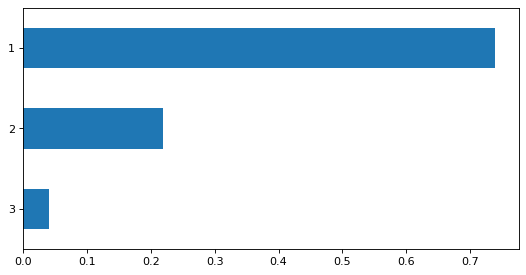

In [35]:
import matplotlib.pyplot as plt

length_dpi = 8
height_dpi = 4

figure(figsize=(length_dpi, height_dpi), dpi=80)
complete_df.topic_level.value_counts(normalize=True).head(3).plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

# Load dataset and filter out unknown values

In [109]:
cat_complete_df = pd.read_csv('/content/drive/MyDrive/AI/topics_demo/datasets/top1m_complete/cat_complete_df.csv', sep=',', header=0, index_col=0)

# remove samples with missing either topic 1 or topic 2
known_complete_df = cat_complete_df[(cat_complete_df.topic_1 != 'Unknown') & (cat_complete_df.topic_2 != 'Unknown')]
known_complete_df = known_complete_df[(known_complete_df.topic_1 != 'value_not_provided') & (known_complete_df.topic_2 != 'value_not_provided')]
known_complete_df.reset_index(drop=True, inplace=True)
known_complete_df

,rank,domain,topic_1,topic_2,cat_1,cat_2,kcat_1,kcat_2
0,2,www.google.com,/Internet & Telecom,/Internet & Telecom/Search Engines,Internet & Telecom,Internet & Telecom,12,12
1,3,microsoft.com,/Computers & Electronics/Consumer Electronics,/Computers & Electronics/Software,Computers & Electronics,Computers & Electronics,6,6
2,4,data.microsoft.com,/Computers & Electronics/Software,/Computers & Electronics,Computers & Electronics,Computers & Electronics,6,6
3,6,events.data.microsoft.com,/Computers & Electronics,/News,Computers & Electronics,News,6,15
4,7,cloud.netflix.com,/Arts & Entertainment/Online Video,/Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,1,1
...,...,...,...,...,...,...,...,...
739278,999996,acuityeyecaregroup.com,/Home & Garden,/Home & Garden/Home Improvement,Home & Garden,Home & Garden,11,11
739279,999997,acuracertified.com,/Autos & Vehicles/Vehicle Shopping,/Autos & Vehicles,Autos & Vehicles,Autos & Vehicles,2,2
739280,999998,ad.dyntracker.de,/Business & Industrial/Advertising & Marketing,/Internet & Telecom,Business & Industrial,Internet & Telecom,5,12
739281,999999,ad.mediaprimaplus.com.my.cdn.cloudflare.net,/Arts & Entertainment,/Business & Industrial/Advertising & Marketing,Arts & Entertainment,Business & Industrial,1,5


# Frequencies of single topics

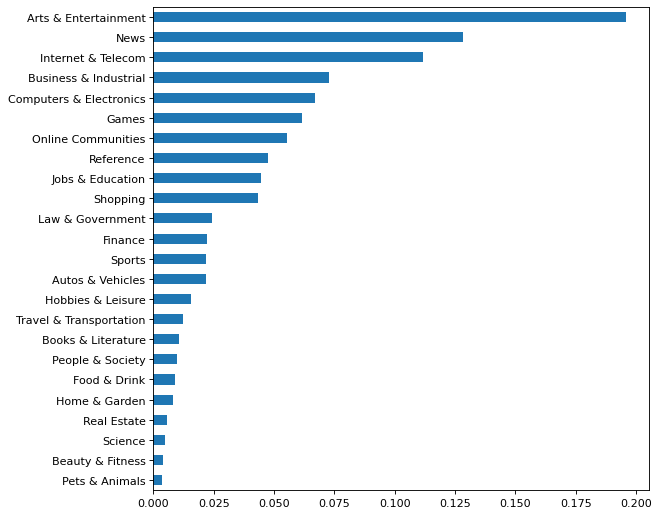

In [113]:
import matplotlib.pyplot as plt

length_dpi = 8
height_dpi = 8

figure(figsize=(length_dpi, height_dpi), dpi=80)
known_complete_df.cat_1.value_counts(normalize=True).plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

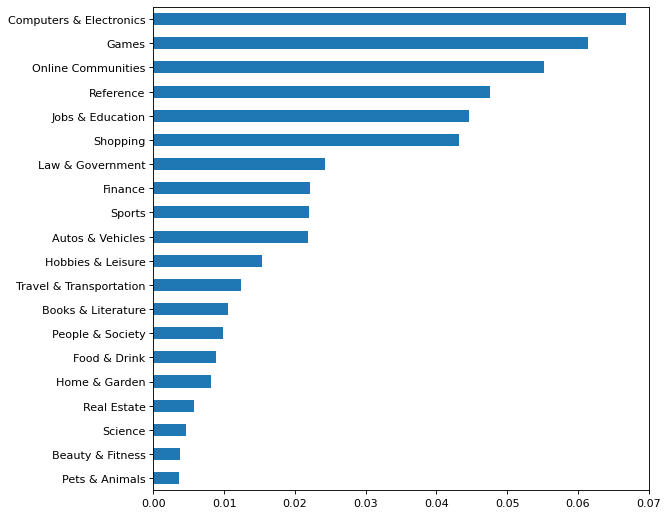

In [112]:
import matplotlib.pyplot as plt

length_dpi = 8
height_dpi = 8

figure(figsize=(length_dpi, height_dpi), dpi=80)
known_complete_df.cat_1.value_counts(normalize=True).tail(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

In [66]:
known_complete_df['topic_pair'] = known_complete_df['cat_1'] +' -> '+ known_complete_df['cat_2']
# known_complete_df.topic_pair.value_counts(normalize=True).plot()

## Hist plots of category topics

We have extracted topic categories out of our simple topics.  
We now want to find the relative frequencies of the top 20 most frequent topic category pairs, as well as the bottom 20.

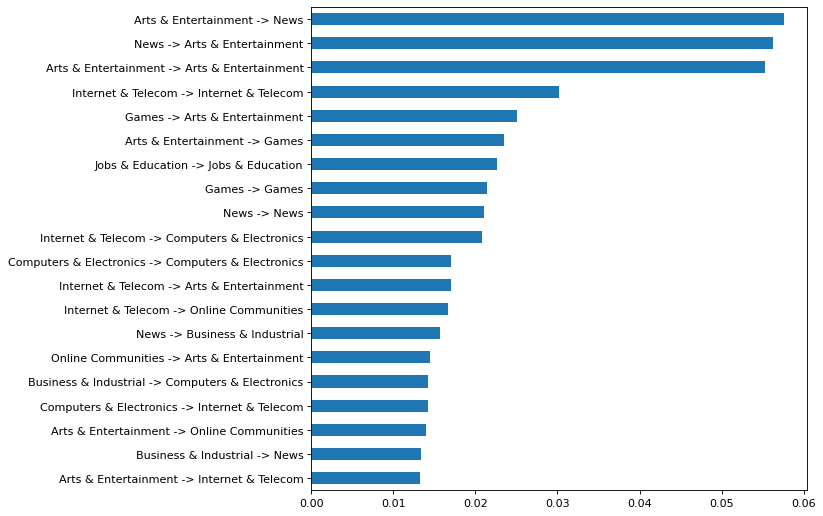

In [72]:
import matplotlib.pyplot as plt

length_dpi = 8
height_dpi = 8

figure(figsize=(length_dpi, height_dpi), dpi=80)
known_complete_df.topic_pair.value_counts(normalize=True).head(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

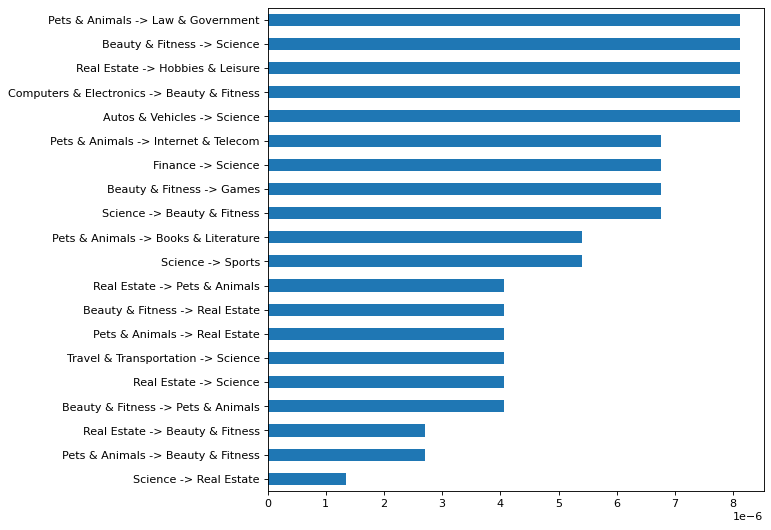

In [73]:
import matplotlib.pyplot as plt

length_dpi = 8
height_dpi = 8

figure(figsize=(length_dpi, height_dpi), dpi=80)
known_complete_df.topic_pair.value_counts(normalize=True).tail(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

# Conditionnal probabilities of topic_2 knowing topic_1

The following matrix contains the probability of topic_2 knowing topic_1.  
All rows sum to 100%.  

In [102]:
# probability percentages of topic_2 knowing topic_1
condition_b_a_df = pd.crosstab(known_complete_df['cat_1'], known_complete_df['cat_2'], normalize='index') * 100
condition_b_a_df

cat_2,Arts & Entertainment,Autos & Vehicles,Beauty & Fitness,Books & Literature,Business & Industrial,Computers & Electronics,Finance,Food & Drink,Games,Hobbies & Leisure,...,News,Online Communities,People & Society,Pets & Animals,Real Estate,Reference,Science,Shopping,Sports,Travel & Transportation
cat_1,,,,,,,,,,,,,,,,,,,,,
Arts & Entertainment,28.222072,0.314500,0.250909,1.352696,1.535867,1.480570,0.286852,0.304132,11.999392,1.266295,...,29.413025,7.162310,1.279428,0.287543,0.100225,3.053071,0.124418,2.324537,0.958707,0.330398
Autos & Vehicles,4.000248,46.083349,0.043346,0.377732,3.461515,1.956778,0.990773,0.049539,0.916465,3.591554,...,2.650319,9.833426,0.322001,0.123847,0.142424,1.925816,0.037154,11.164778,4.737135,0.798811
Beauty & Fitness,11.214618,0.644930,41.884629,1.110713,1.934790,0.680760,0.573271,2.293085,0.179147,1.003225,...,2.866356,2.149767,8.348262,0.107488,0.107488,1.898961,0.214977,16.696525,2.400573,0.895736
Books & Literature,28.639587,0.747905,0.335268,1.083172,2.798195,3.791103,0.141844,0.232108,1.276596,0.825274,...,4.951644,7.878788,4.874275,0.206319,0.206319,25.222437,0.283688,6.537718,0.257898,0.386847
Business & Industrial,5.354456,1.552662,0.118864,0.319447,12.111138,19.581004,6.067641,0.501458,0.802333,0.986201,...,18.286500,1.805249,0.689040,0.048289,0.531174,4.709990,0.622179,6.255224,0.156009,1.524804
Computers & Electronics,4.909828,0.583587,0.012158,0.409321,14.812563,25.582573,0.581560,0.040527,2.565350,0.279635,...,5.576494,6.638298,0.074975,0.024316,0.014184,5.724417,5.033435,3.485309,0.253293,0.089159
Finance,4.724073,1.870073,0.158895,0.091670,23.137566,3.049563,33.086842,0.110004,0.782253,0.213897,...,10.872089,1.601173,0.745585,0.140561,1.729512,7.046385,0.030557,2.817332,0.293345,0.433906
Food & Drink,7.019969,0.138249,0.537634,0.276498,5.192012,0.337942,0.199693,57.511521,0.291859,2.012289,...,2.135177,2.764977,1.505376,0.261137,0.122888,6.113671,0.138249,4.470046,0.153610,2.488479
Games,40.871520,0.401155,0.046287,0.136657,0.841985,6.151778,0.216007,0.046287,34.803500,0.257885,...,0.912517,4.331151,0.324010,0.290948,0.044083,1.161586,0.079349,0.586303,1.084441,0.103595


We plot this conditional probability table to a heatmap to see the extreme values. 

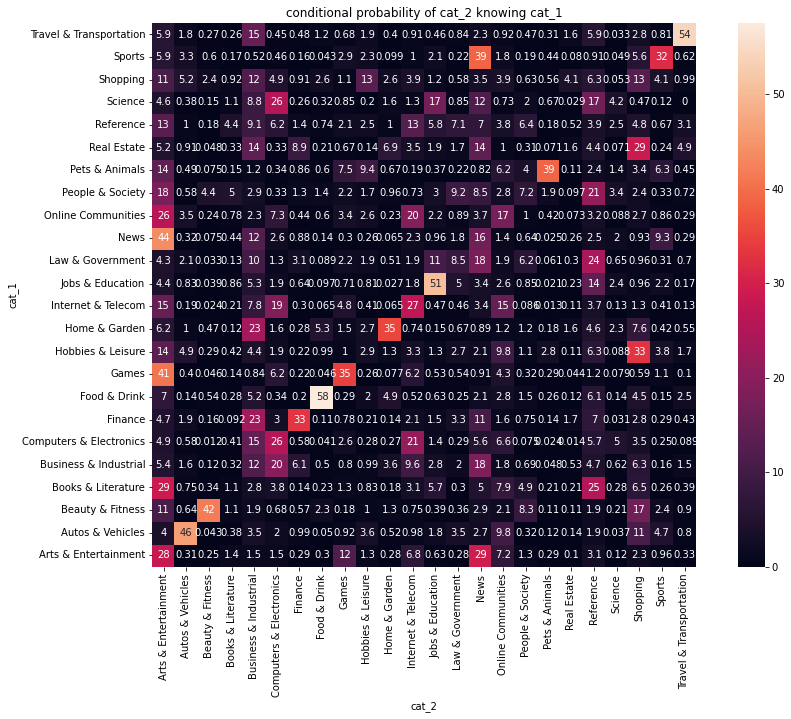

In [108]:
# known_complete_df[['cat_1', 'cat_2']]
from matplotlib.colors import LogNorm, Normalize

fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(condition_b_a_df, ax=ax, square=True, annot=True).set_title("conditional probability of cat_2 knowing cat_1")
ax.invert_yaxis()

In [114]:
# save conditional probas table
condition_b_a_df.to_csv('/content/drive/MyDrive/AI/topics_demo/datasets/top1m_complete/condition_b_a_df.csv')